### Codificação de Variáveis Categóricas ###

Em diversos momentos, deseja-se categorizar de um modo diferente as variáveis, de modo que, para alguma finalidade, seja utilizado de modo mais vantajoso

- Por exemplo: Já fizemos uso do one-hot encoding, que categoriza de modo binário o atributo.
    - ex: baixo, regular, alto -> (1, 0, 0), (0, 1, 0), (0, 0, 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('dados/municipios_mba.csv')

In [2]:
data.head()

,gid,UF,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,IDH,urbaniz,dens_pop_urbana
0,752,ACRE,Acrelândia,2010.0,151120.015625,12241,2,5.2,33.532382,73.6,19.2,660,rural,muito baixa
1,747,ACRE,Assis Brasil,2010.0,48347.300781,5662,1,5.0,32.252163,74.2,18.9,664,rural,muito baixa
2,748,ACRE,Brasiléia,2010.0,194979.828125,20238,1,3.0,31.663354,75.3,19.5,667,baixo,média
3,754,ACRE,Bujari,2010.0,88708.031250,6772,2,4.8,33.501357,73.4,19.1,659,rural,muito baixa
4,751,ACRE,Capixaba,2010.0,89052.679688,9287,1,4.4,33.431383,75.4,18.1,661,rural,muito baixa


In [3]:
data['urbaniz'].unique()

array(['rural', 'baixo', 'médio', 'muito alto', 'alto', nan], dtype=object)

Como podemos ver, temos os rótulos rural, baixo, médio, alto e muito alto, que, apenas desse modo, não nos servem de modo comparativo. Por exemplo, não podemos verificar se a urbanização > baixo, afinal, apenas iria comparar strings

In [4]:
# nos retorna as contagens do groupby

data.groupby('urbaniz').size()

urbaniz
alto            21
baixo           38
muito alto      24
médio           97
rural         1690
dtype: int64

<AxesSubplot:xlabel='urbaniz'>

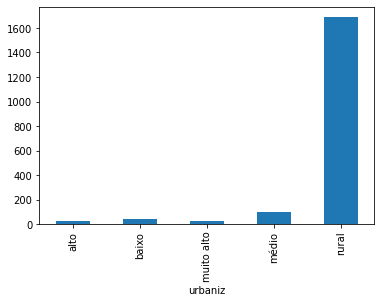

In [5]:
data.groupby('urbaniz').size().plot(kind='bar')

Categóricos Nominais

- Em casos onde a ordem é irrelevante, podemos categorizá-los de forma alfabética, onde um valor nulo será representado por '-1'

In [7]:
data['urban_cod'] = data['urbaniz'].astype('category').cat.codes

data.dtypes

gid                  int64
UF                  object
nome                object
Censo              float64
PIB                float64
pop                  int64
classe               int64
desemprego         float64
pop_sanea          float64
expec_vida         float64
pobreza            float64
IDH                  int64
urbaniz             object
dens_pop_urbana     object
urban_cod             int8
dtype: object

In [10]:
# aqui podemos verificar que realmente o NaN se torna um código -1

data[data['urbaniz'].isna()]

,gid,UF,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,IDH,urbaniz,dens_pop_urbana,urban_cod
1564,2687,MINAS GERAIS,Abadia dos Dourados,2010.0,71222.171875,6805,2,5.8,78.908075,77.8,4.7,730,NaN,NaN,-1
1565,2688,MINAS GERAIS,Abaeté,2010.0,239440.546875,23258,2,5.5,75.857001,77.2,3.8,724,NaN,NaN,-1
1566,2689,MINAS GERAIS,Abre Campo,2010.0,93464.468750,13177,1,5.9,78.871206,77.1,3.9,724,NaN,NaN,-1
1567,2690,MINAS GERAIS,Acaiaca,2010.0,21347.224609,4234,1,6.7,78.444294,76.8,5.1,727,NaN,NaN,-1
1568,2691,MINAS GERAIS,Açucena,2010.0,52611.050781,11409,1,7.3,75.854065,78.5,5.6,734,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5421,1099,SERGIPE,Siriri,2010.0,77082.734375,7946,2,7.6,50.685140,72.7,15.8,660,NaN,NaN,-1
5422,1198,SERGIPE,Telha,2010.0,16041.541992,2969,1,8.0,47.393441,71.7,15.3,659,NaN,NaN,-1
5423,1221,SERGIPE,Tobias Barreto,2010.0,243702.859375,49261,1,9.7,50.764052,74.0,16.3,669,NaN,NaN,-1
5424,1237,SERGIPE,Tomar do Geru,2010.0,62506.460938,13717,1,9.3,48.871914,74.3,14.9,669,NaN,NaN,-1


#### Usando map() por meio de dicionário ####

Essa é uma opção mais genérica e bem mais interessante, pois, além de extremamente rápida computacionalmente, você fica no controle

In [11]:
cat_urban = data['urbaniz'].unique()
num_urban = np.arange(data['urbaniz'].unique().shape[0])
print(cat_urban)
print(num_urban)

['rural' 'baixo' 'médio' 'muito alto' 'alto' nan]
[0 1 2 3 4 5]


In [12]:
map_urban = dict(zip(cat_urban, num_urban))

print(f'Dicionário: {map_urban}')

Dicionário: {'rural': 0, 'baixo': 1, 'médio': 2, 'muito alto': 3, 'alto': 4, nan: 5}


#### Categóricos Ordinais ####

Para cenários onde as categorias podem ser ordenadas, como notas, faixas salariais, escalas, podemos utilizar a ordenação categórica:

In [13]:
cat_ord_urban = ['rural', 'baixo', 'médio', 'alto', 'muito alto']
print(cat_ord_urban)

['rural', 'baixo', 'médio', 'alto', 'muito alto']


In [14]:
urban_ord_type = pd.api.types.CategoricalDtype(categories = cat_ord_urban, ordered = True)
data['urban_ord'] = data['urbaniz'].astype(urban_ord_type)

In [15]:
data['urban_ord'].dtype

CategoricalDtype(categories=['rural', 'baixo', 'médio', 'alto', 'muito alto'], ordered=True)

In [16]:
data['urban_ord']

0       rural
1       rural
2       baixo
3       rural
4       rural
        ...  
5560    rural
5561    rural
5562    rural
5563    rural
5564    rural
Name: urban_ord, Length: 5565, dtype: category
Categories (5, object): ['rural' < 'baixo' < 'médio' < 'alto' < 'muito alto']

In [20]:
data[data['urban_ord'] < 'médio']

,gid,UF,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,IDH,urbaniz,dens_pop_urbana,urban_cod,urban_ord
0,752,ACRE,Acrelândia,2010.0,151120.015625,12241,2,5.2,33.532382,73.6,19.2,660,rural,muito baixa,4,rural
1,747,ACRE,Assis Brasil,2010.0,48347.300781,5662,1,5.0,32.252163,74.2,18.9,664,rural,muito baixa,4,rural
2,748,ACRE,Brasiléia,2010.0,194979.828125,20238,1,3.0,31.663354,75.3,19.5,667,baixo,média,1,baixo
3,754,ACRE,Bujari,2010.0,88708.031250,6772,2,4.8,33.501357,73.4,19.1,659,rural,muito baixa,4,rural
4,751,ACRE,Capixaba,2010.0,89052.679688,9287,1,4.4,33.431383,75.4,18.1,661,rural,muito baixa,4,rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,1011,TOCANTINS,Tocantinópolis,2010.0,124657.000000,21826,1,6.5,28.405306,75.0,12.6,705,rural,muito baixa,4,rural
5561,5545,TOCANTINS,Tupirama,2010.0,34883.894531,1474,3,4.6,29.447854,74.8,12.9,694,rural,muito baixa,4,rural
5562,5546,TOCANTINS,Tupiratins,2010.0,30757.437500,2143,2,7.0,27.172728,74.2,12.6,696,rural,muito baixa,4,rural
5563,5141,TOCANTINS,Wanderlândia,2010.0,66966.773438,9493,1,5.4,27.762133,74.4,12.7,692,rural,muito baixa,4,rural


Para codificação do tipo one-hot ou dummy variables, é muito mais simples

- é o ideal quando se possui dados categóricos não ordinais

In [24]:
dummy_vars = pd.get_dummies(data['urbaniz'])

data = pd.concat([data, dummy_vars], axis=1, sort=False)

atts_dummy = ['urbaniz'] + list(cat_urban)

print(atts_dummy)

['urbaniz', 'rural', 'baixo', 'médio', 'muito alto', 'alto', nan]


In [26]:
dummy_vars = pd.get_dummies(data['urbaniz'])

data = pd.concat([data, dummy_vars], axis=1, sort=False)

atts_dummy = ['urbaniz'] + list(cat_urban)
print(atts_dummy)

data.loc[:13 , atts_dummy]

['urbaniz', 'rural', 'baixo', 'médio', 'muito alto', 'alto', nan]


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index([nan], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"